In [225]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\ander\OneDrive\Documentos\machine-learn-project\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ander\OneDrive\Documentos\machine-learn-project\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ander\OneDrive\Documentos\machine-learn-project\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ander\OneDrive\Documentos\machine-learn-project\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [226]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import deepcopy as cp
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay
)
from sklearn.tree import (
    DecisionTreeClassifier, 
    plot_tree
)
from sklearn.svm import SVC

### Data Processing ###

In [227]:
data = pd.read_csv('data/winequalityN.csv')

In [228]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [229]:
data.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

In [230]:
data.dropna(axis=0,inplace=True)

In [231]:
white_data = data[data['type'] == "white"].copy()
red_data = data[data['type'] == "red"].copy()

In [232]:
white_data.reset_index(inplace=True)
red_data.reset_index(inplace=True)

In [233]:
white_data["opinion"] = (white_data.quality > 5).astype(int)
red_data["opinion"] = (white_data.quality > 5).astype(int)

In [234]:
white_data.head()

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [246]:
white_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4870 non-null   int64  
 1   type                  4870 non-null   object 
 2   fixed acidity         4870 non-null   float64
 3   volatile acidity      4870 non-null   float64
 4   citric acid           4870 non-null   float64
 5   residual sugar        4870 non-null   float64
 6   chlorides             4870 non-null   float64
 7   free sulfur dioxide   4870 non-null   float64
 8   total sulfur dioxide  4870 non-null   float64
 9   density               4870 non-null   float64
 10  pH                    4870 non-null   float64
 11  sulphates             4870 non-null   float64
 12  alcohol               4870 non-null   float64
 13  quality               4870 non-null   int64  
 14  opinion               4870 non-null   int32  
dtypes: float64(11), int32

- **Type:** categorical
- **Fixed Acidity:** discrete
- **Fixed Acidity:** discrete
- **Volatile Acidity:** continuous 
- **Citric Acid:** continuous 
- **Residual Sugar:** continuous 
- **Chlorides:** continuous 
- **Free Sulfur Dioxide:** discrete
- **Total Sulfur Dioxide:** discrete
- **Density:** continuous 
- **pH:** continuous 
- **Sulphates:** continuous 
- **Alcohol:** continuous 
- **Quality:** discrete
- **Opinion:** categorical

In [236]:
white_data.describe()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,2457.259138,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029,0.665298
std,1409.940147,0.843444,0.100528,0.120915,5.070853,0.021846,17.012967,42.490515,0.002993,0.150902,0.114196,1.231251,0.885699,0.471935
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,1241.250000,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000,0.000000
50%,2458.500000,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993735,3.180000,0.470000,10.400000,6.000000,1.000000
75%,3677.750000,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,4897.000000,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


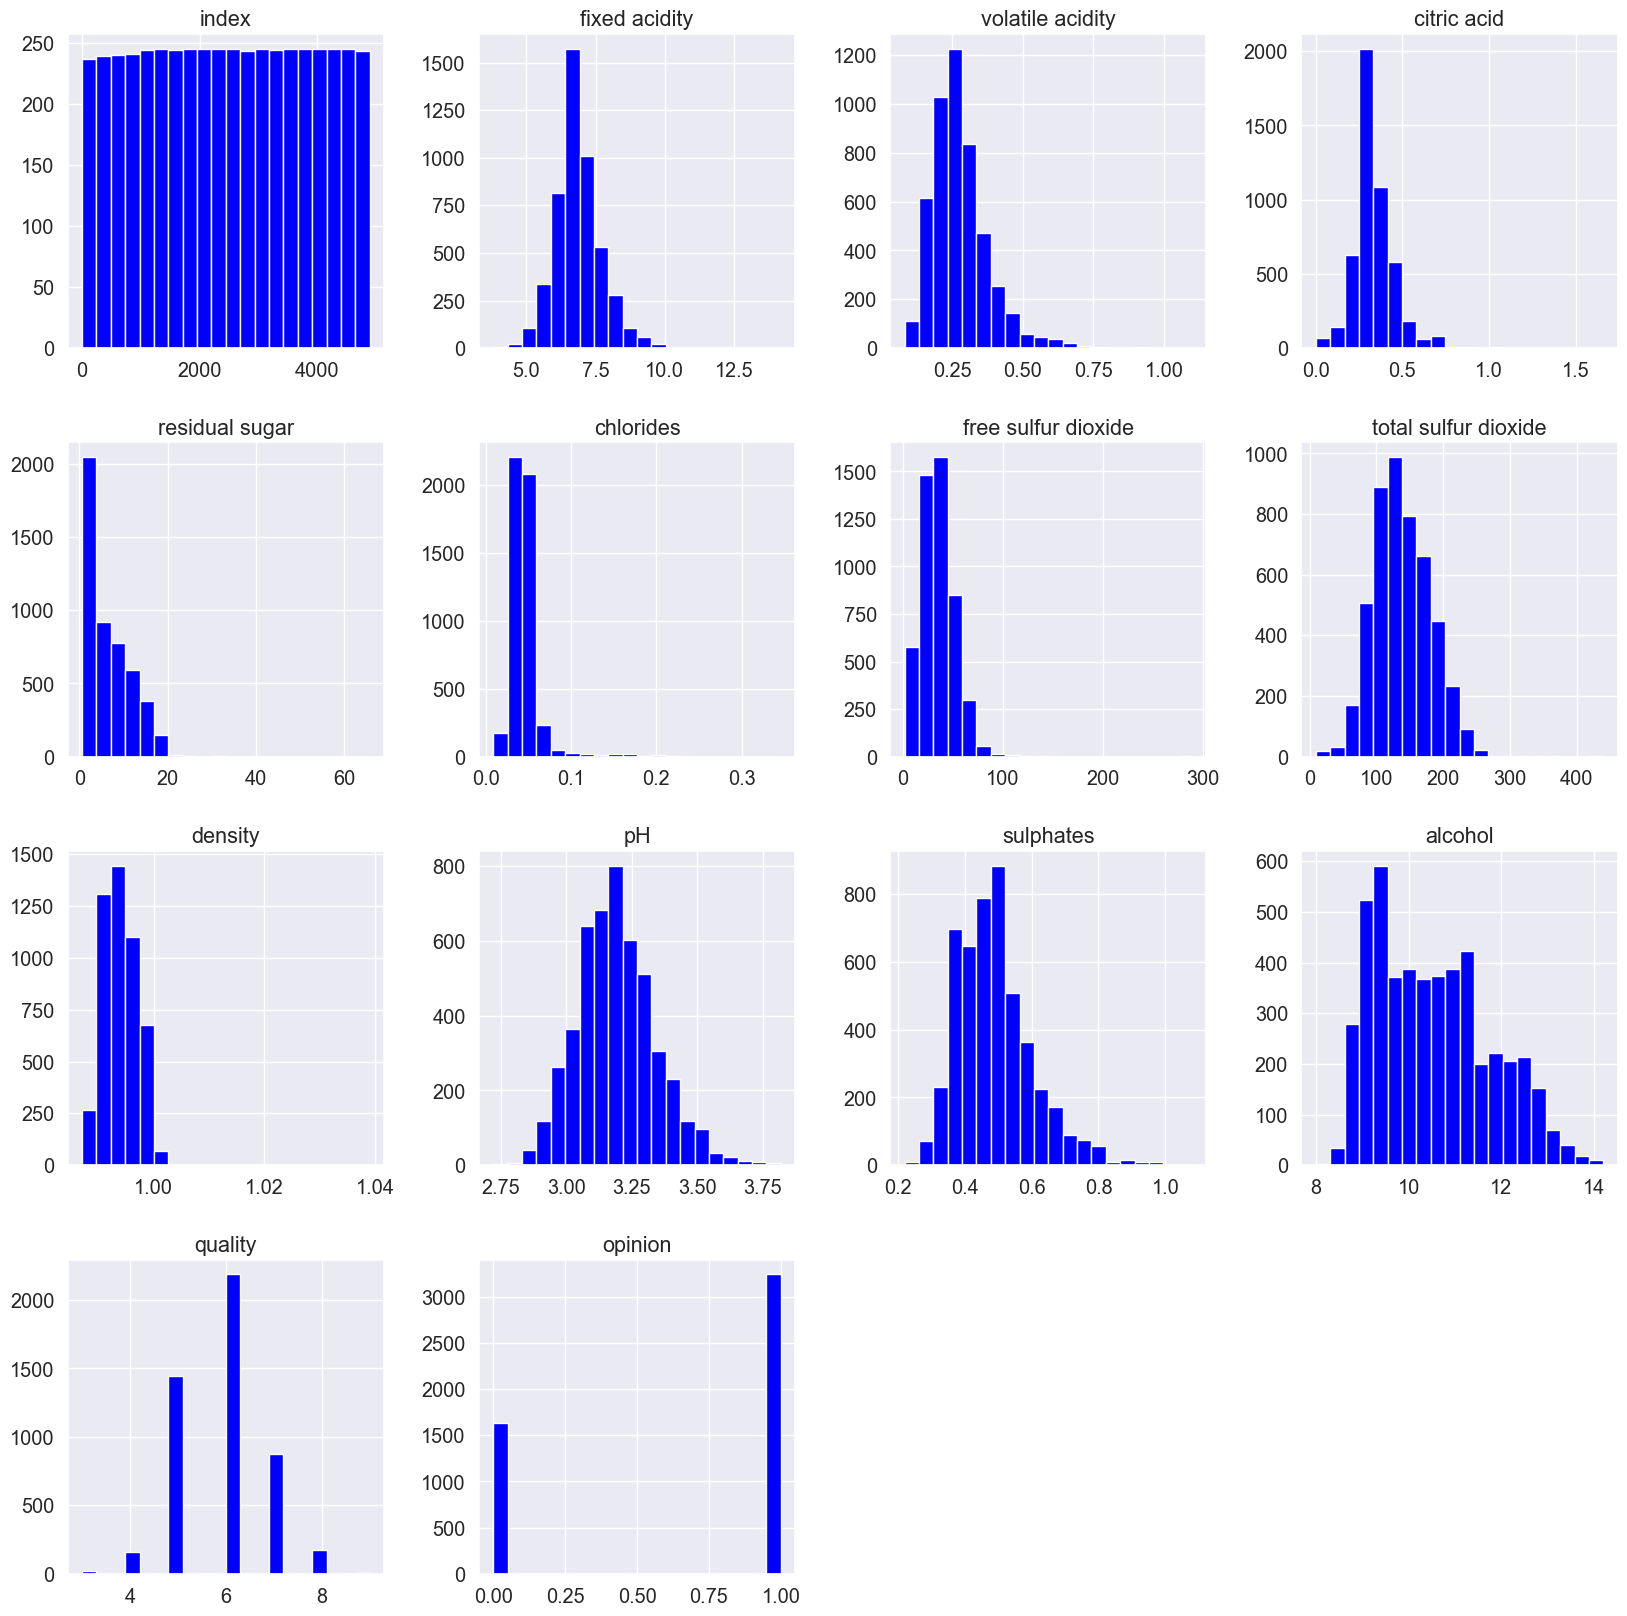

In [237]:
sns.set(font_scale=1.3,rc={"figure.figsize":(20,20)})
eixo = white_data.hist(bins=20, color="blue")

In [252]:
white_corr = white_data[['index','fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']]

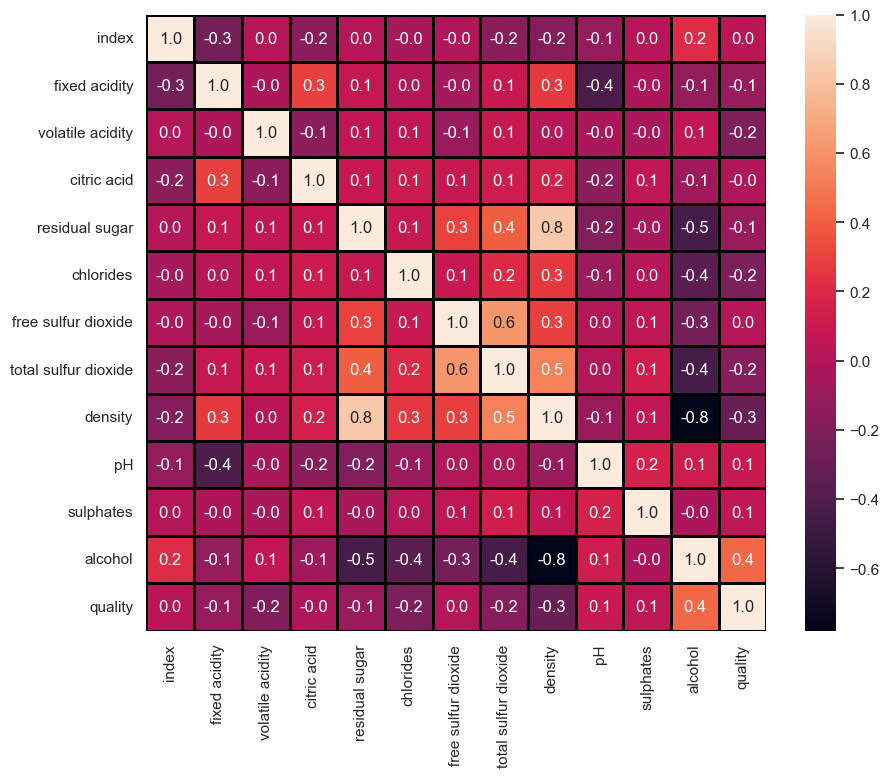

In [255]:
correlation = white_corr.corr()
sns.set(rc = {'figure.figsize':(10,8)})
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=1, linecolor='black')
plot;

In [ ]:
VARS=['fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol'
]

X=white_data[VARS]
y=white_data['opinion']

X_train_cv, X_test, y_train_cv, y_test=train_test_split(X.values,
                                                          y.values,
                                                          test_size=0.2, # 20 % da base
                                                          random_state=42,
                                                          stratify=y)

config = [
    (SVC, {'kernel': 'rbf','probability':True}),
    (SVC, {'kernel': 'rbf', 'gamma': 2,'probability':True}),
    (SVC, {'degree': 3, 'kernel': 'poly','probability':True} ),
    (SVC, {'degree': 5, 'kernel': 'poly','probability':True} ),
    (SVC, {'degree': 10, 'kernel': 'poly','probability':True} ),
    (LogisticRegression, {}),
    (DecisionTreeClassifier, {'min_samples_leaf': 50}),
]

### Functions

In [ ]:
def scale_data(x,x_test,scaler=StandardScaler()): 
    X_train_scaled = scaler.fit_transform(x)
    X_test_scaled  = scaler.transform(x_test)
    return X_train_scaled,X_test_scaled,scaler


In [ ]:
def train_data(x,y,model_klass,model_kwargs={}):
    model = model_klass(**model_kwargs)
    model.fit(x, y)
    y_pred = model.predict(x)
    return y_pred,model

In [ ]:
def specificity_score(y,y_pred):
    cm          = confusion_matrix(y,y_pred)
    specificity = (cm[0,0]/(cm[0, 0]+cm[0,1]))
    return specificity

In [ ]:
def interpolation(fpr, tpr):
    interp_fpr    = np.linspace(0, 1, 100)
    interp_tpr    = np.interp(interp_fpr, fpr, tpr)
    interp_tpr[0] = 0.
    return interp_fpr, interp_tpr

In [ ]:
def train_model(X,y,model,model_kwargs={}):
    cv          = StratifiedKFold(n_splits=10)
    f1_train    = []
    f1_val      = []
    models      = []
    recall      = []
    scalers     = []
    accuracy    = []
    precision   = []
    specificity = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val   = X[val_idx, :]
        y_val   = y[val_idx]
        X_train_scaled,X_val_scaled,scaler=scale_data(X_train,X_val)
        scalers.append(scaler)
        y_pred,train_model = train_data(X_train_scaled,y_train,model,model_kwargs)
        y_pred_test = train_model.predict(X_val_scaled)
        y_hat_test = train_model.predict_proba(X_val_scaled)
        models.append(train_model)
        f1_train.append(f1_score(y_train, y_pred))
        f1_val.append(f1_score(y_val,y_pred_test))
        accuracy.append(accuracy_score(y_val,y_pred_test))
        precision.append(precision_score(y_val,y_pred_test))
        recall.append(recall_score(y_val,y_pred_test))
        specificity.append(specificity_score(y_val,y_pred_test))
        print(f'''FOLD {fold}: F1_train:{f1_score(y_train, y_pred):.2} F1_test:{f1_score(y_val,y_pred_test):.2} Accuracy:{accuracy_score(y_val,y_pred_test):.2} Precision:{precision_score(y_val,y_pred_test):.2} Recall:{recall_score(y_val,y_pred_test):.2}''') 
    print()
    mean_val = np.mean(f1_val)
    std_val  = np.std(f1_val)
    print(f"F1-Score Train Mean:{np.mean(f1_train):.2} +-{np.std(f1_train):.2}")
    print(f"F1-Score Test Mean:{mean_val:.2} +-{std_val:.2}")
    print(f"Accuracy Mean:{np.mean(accuracy):.2} +-{np.std(accuracy):.2}")
    print(f"Precision Mean:{np.mean(precision):.2} +-{np.std(precision):.2}")
    print(f"Recall Mean:{np.mean(recall):.2} +-{np.std(recall):.2}")
    print()
    best_model_idx = np.argmax(f1_val)
    print(f"The best fold is: {best_model_idx} ")
    best_model    = models[best_model_idx]
    best_scaler   = scalers[best_model_idx]
    X_test_scaled = best_scaler.transform(X_test)
    y_pred_test   = train_model.predict(X_test_scaled)
    print()
    print(f"My F1-Score result for the test set is: {f1_score(y_test, y_pred_test):.2} ")
    return best_model,best_scaler,mean_val,std_val
    

In [ ]:
def ROC_curve(X,y,model,model_kwargs={}):
    fprs = []
    tprs = []
    auc  = []
    cv   = StratifiedKFold(n_splits=10)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val   = X[val_idx, :]
        y_val   = y[val_idx]
        X_train_scaled,X_val_scaled,scaler=scale_data(X_train,X_val)
        y_pred,train_model = train_data(X_train_scaled,y_train,model,model_kwargs)
        viz = RocCurveDisplay.from_estimator(train_model,X_val_scaled,y_val,ax=ax,alpha=0.3,lw=1)
        interp_fpr, interp_tpr = interpolation(viz.fpr, viz.tpr)
        fprs.append(interp_fpr)
        tprs.append(interp_tpr)
        auc.append(viz.roc_auc) 
    
    mean_fpr = np.mean(fprs, axis=0)
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(auc)
    std_auc  = np.std(auc)

    ax.plot(
        mean_fpr,
        mean_tpr,
        color = 'blue',
        lw    = 2,
        label = r"Mean ROC (AUC = %.2f $\pm$ %.2f)" %(mean_auc, std_auc)
        )
    ax.plot(np.linspace(0, 1, 100),
            np.linspace(0, 1, 100),
            color = 'g',
            ls    = ":",
            lw    = 0.5)
    ax.legend()

### Model Training 

In [ ]:
best_folds_models=[]
best_folds_scalers=[]
results = []
for model_class, setting in config:
    print()
    print(f'============== {model_class.__name__, setting} ==============')
    best_model, best_scaler, mean_val, std_val = train_model(X_train_cv, y_train_cv, model_class, setting)
    results.append(mean_val)
    best_folds_models.append(best_model)
    best_folds_scalers.append(best_scaler)
best_white_model_idx = np.argmax(results)
best_white_model = best_folds_models[best_white_model_idx]
best_white_scaler = best_folds_scalers[best_white_model_idx]  


============== ('SVC', {'kernel': 'rbf', 'probability': True}) ==============
FOLD 0: F1_train:0.87 F1_test:0.84 Accuracy:0.78 Precision:0.83 Recall:0.85
FOLD 1: F1_train:0.86 F1_test:0.86 Accuracy:0.81 Precision:0.82 Recall:0.91
FOLD 2: F1_train:0.87 F1_test:0.83 Accuracy:0.77 Precision:0.81 Recall:0.86
FOLD 3: F1_train:0.87 F1_test:0.85 Accuracy:0.79 Precision:0.83 Recall:0.87
FOLD 4: F1_train:0.87 F1_test:0.83 Accuracy:0.76 Precision:0.8 Recall:0.86
FOLD 5: F1_train:0.87 F1_test:0.85 Accuracy:0.79 Precision:0.81 Recall:0.9
FOLD 6: F1_train:0.87 F1_test:0.85 Accuracy:0.8 Precision:0.82 Recall:0.89
FOLD 7: F1_train:0.87 F1_test:0.84 Accuracy:0.78 Precision:0.83 Recall:0.85
FOLD 8: F1_train:0.87 F1_test:0.86 Accuracy:0.81 Precision:0.85 Recall:0.88
FOLD 9: F1_train:0.87 F1_test:0.85 Accuracy:0.8 Precision:0.83 Recall:0.88

F1-Score Train Mean:0.87 +-0.0015
F1-Score Test Mean:0.85 +-0.012
Accuracy Mean:0.79 +-0.015
Precision Mean:0.82 +-0.012
Recall Mean:0.88 +-0.021

The best fold is:

In [ ]:
results

[0.847251688343692,
 0.851963330193786,
 0.8363841661402978,
 0.8313629722108054,
 0.8249010265784342,
 0.8264966145626162,
 0.8164390304593645]

In [ ]:
best_white_model


SVC(gamma=2, probability=True)

In [ ]:
best_white_scaler

StandardScaler()

### ROC Curve

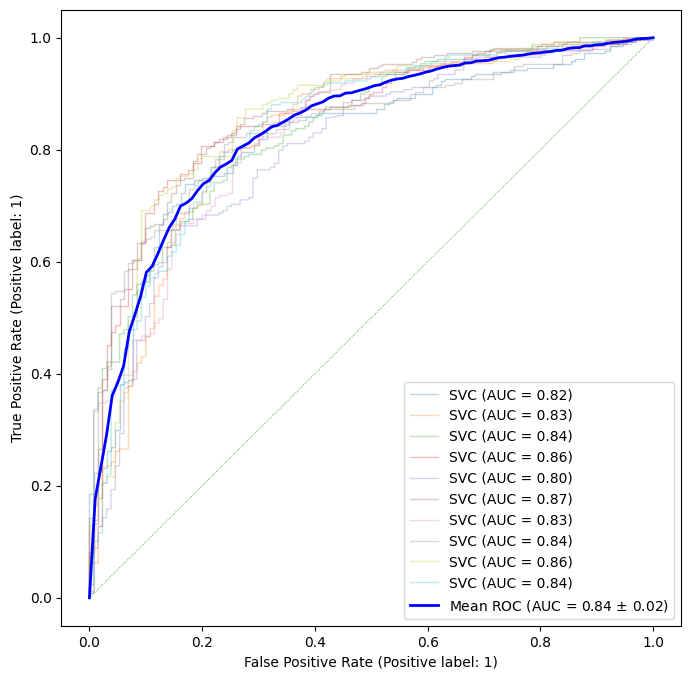

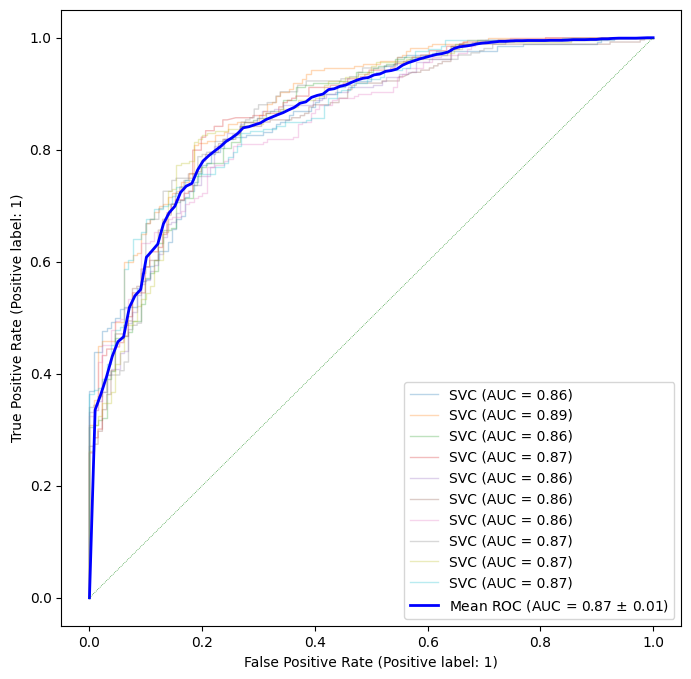

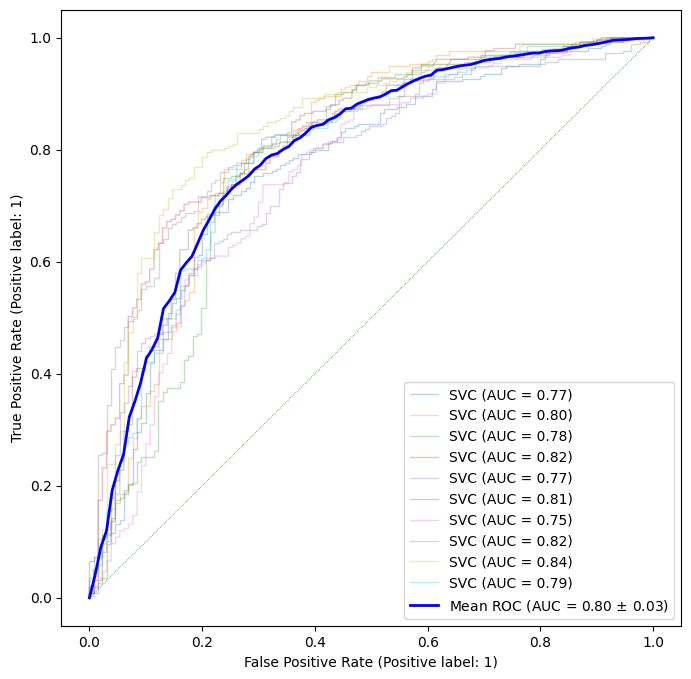

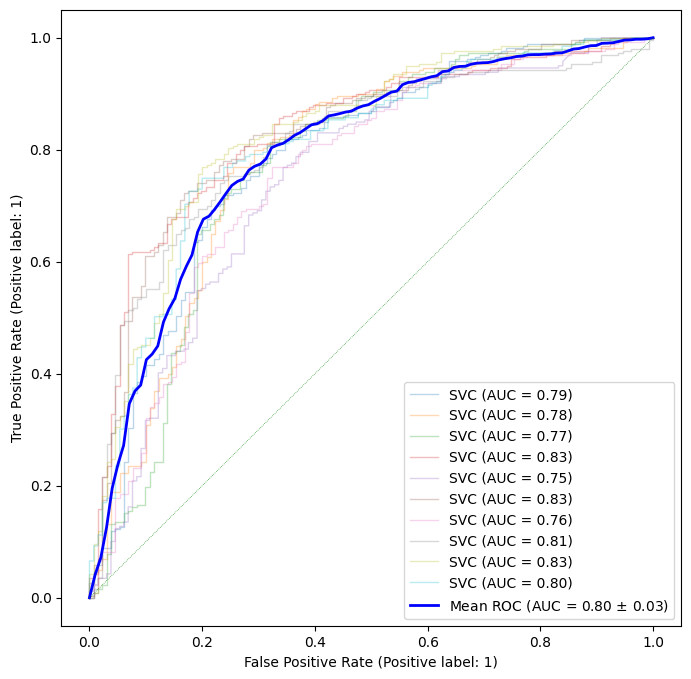

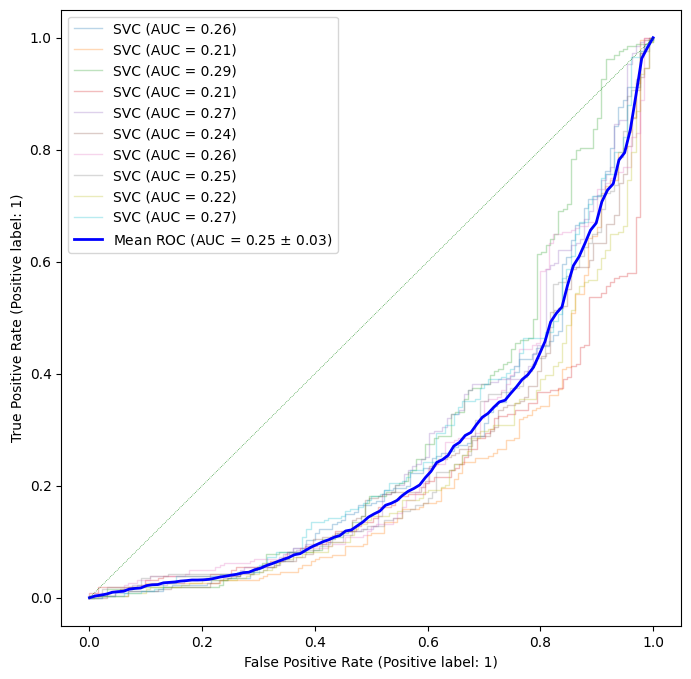

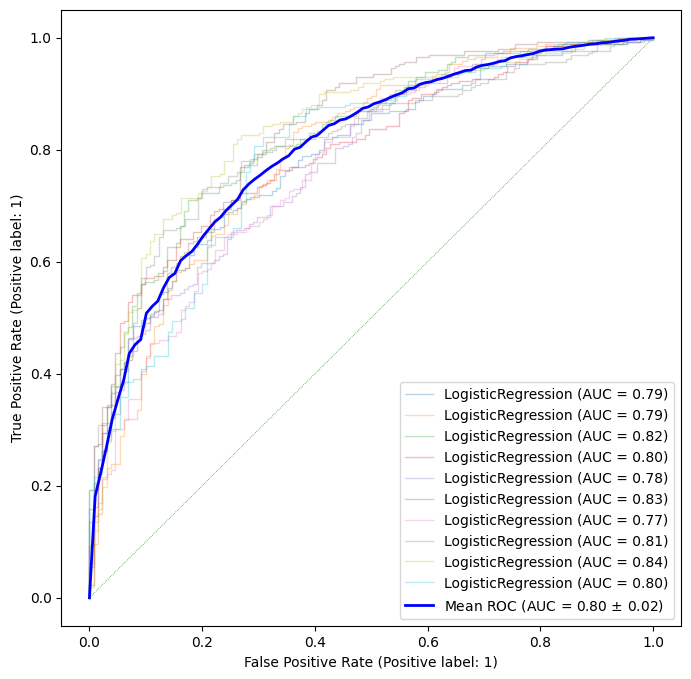

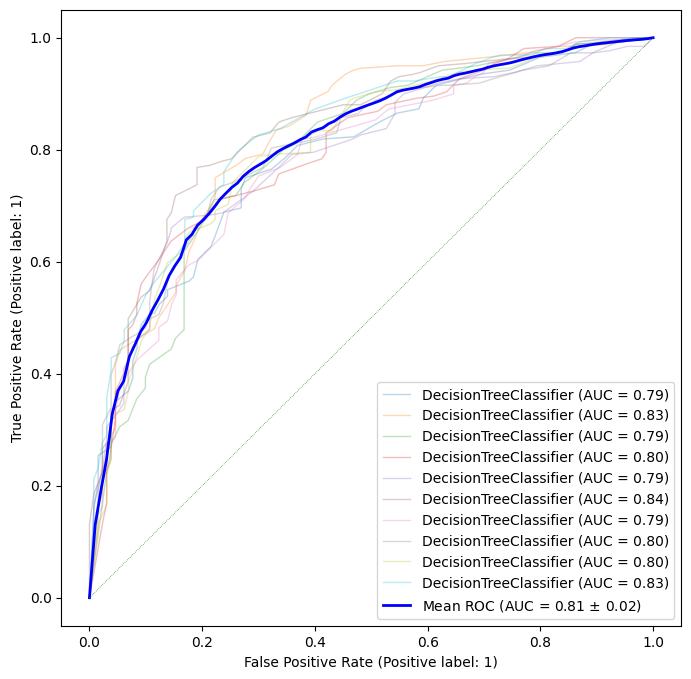

In [ ]:
for model_class, setting in config:
    ROC_curve(X_train_cv, y_train_cv, model_class, setting)

### Model Evaluation

In [ ]:
red_data.head()

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
X_red = red_data[VARS]
y_red = red_data['opinion']

In [ ]:
X_red_scaled = best_white_scaler.transform(X_red)

c:\Users\ander\OneDrive\Documentos\machine-learn-project\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
y_red_pred = best_white_model.predict(X_red_scaled)

In [ ]:
print(f'''
        F1_test:{f1_score(y_red,y_red_pred):.4} 
        Accuracy:{accuracy_score(y_red,y_red_pred):.4} 
        Precision:{precision_score(y_red,y_red_pred):.4} 
        Recall:{recall_score(y_red,y_red_pred):.4}
    ''')


        F1_test:0.7917 
        Accuracy:0.6554 
        Precision:0.6552 
        Recall:1.0
    


### Conclusion

|        White        |  % |      Red      |  %  |
|:-------------------:|:--:|:-------------:|:---:|
| F1-Score Train Mean | 87 |       -       |  -  |
|  F1-Score Val Mean  | 85 | F1-Score Test |  79 |
|    Accuracy Val Mean    | 79 |    Accuracy Test   |  66 |
|    Precision Val Mean   | 82 |   Precision Test   |  66 |
|     Recall Val Mean     | 88 |     Recall Test   | 100 |


The chosen model demonstrated positive performance when evaluated on the training and validation datasets, achieving a high F1 score in both situations. However, when applied to the test dataset, unfortunately, the model did not perform as well as expected.

It is important to note that this discrepancy in performance between the training/validation datasets and the test dataset may indicate an overfitting problem, where the model has over-adapted to the training data, compromising its ability to generalize to new examples.

Additionally, it was observed that the chosen model exhibited lower recall rate in the validation dataset compared to the test dataset. The test dataset exhibited a 100% recall rate, indicating the absence of false negatives.

This discrepancy in sensitivity between the training/validation datasets and the test dataset may indicate that the model is being affected by some bias or specific characteristics present in the previous datasets.